In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/youtube-comments/gameTrailer_CoD.csv
/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/sample_submission.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test_labels.csv.zip
/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip
/kaggle/input/youtube-comment-result/gameTrailer_result.csv
/kaggle/input/youtube-comment-old-to-new/gameTrailer_FarCry6.csv
/kaggle/input/youtube-comment-old-to-new/gameTrailer_CoD.csv
/kaggle/input/youtube-comment-old-to-new/musicVideo_GangnamStyle.csv
/kaggle/input/youtube-comment-old-to-new/apology_LoganPaul.csv
/kaggle/input/youtube-comment-old-to-new/apology_Pokimane.csv
/kaggle/input/youtube-comment-old-to-new/musicVideo_Baby.csv
/kaggle/input/youtube-comment-old-to-new/apology_PewDiePie.csv
/kaggle/input/youtube-comment-old-to-new/musicVideo_Friday.csv
/kaggle/input/youtube-comment-old-to-new/gameTrailer_Pokemon.csv
/kag

In [2]:
import zipfile
unzip = zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/train.csv.zip')
unzip.extractall()
unzip = zipfile.ZipFile('/kaggle/input/jigsaw-toxic-comment-classification-challenge/test.csv.zip')
unzip.extractall()

In [3]:
test_set = pd.read_csv('/kaggle/working/test.csv')
train_set = pd.read_csv('/kaggle/working/train.csv')

In [4]:
stop_words = {
"aren't" : "are not",
"can't" : "cannot",
"couldn't" : "could not",
"didn't" : "did not",
"doesn't" : "does not",
"don't" : "do not",
"hadn't" : "had not",
"hasn't" : "has not",
"haven't" : "have not",
"he'd" : "he would",
"he'll" : "he will",
"he's" : "he is",
"i'd" : "I would",
"i'd" : "I had",
"i'll" : "I will",
"i'm" : "I am",
"isn't" : "is not",
"it's" : "it is",
"it'll":"it will",
"i've" : "I have",
"let's" : "let us",
"mightn't" : "might not",
"mustn't" : "must not",
"shan't" : "shall not",
"she'd" : "she would",
"she'll" : "she will",
"she's" : "she is",
"shouldn't" : "should not",
"that's" : "that is",
"there's" : "there is",
"they'd" : "they would",
"they'll" : "they will",
"they're" : "they are",
"they've" : "they have",
"we'd" : "we would",
"we're" : "we are",
"weren't" : "were not",
"we've" : "we have",
"what'll" : "what will",
"what're" : "what are",
"what's" : "what is",
"what've" : "what have",
"where's" : "where is",
"who'd" : "who would",
"who'll" : "who will",
"who're" : "who are",
"who's" : "who is",
"who've" : "who have",
"won't" : "will not",
"wouldn't" : "would not",
"you'd" : "you would",
"you'll" : "you will",
"you're" : "you are",
"you've" : "you have",
"'re": " are",
"wasn't": "was not",
"we'll":" will",
"didn't": "did not",
"tryin'":"trying"
}

In [5]:
import re

In [6]:
def clean_text(text):
    text = str(text)
    
    text = text.lower()
    text = re.sub(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', '', text) # clean url
    text = re.sub(r'#(\w+)', '', text)   # clean hashes
    text = re.sub(r'@(\w+)', '', text)   # clean @
    text = re.sub(r'<[^>]+>', '', text)  # clean tags
    text = re.sub(r'\d+', '', text)      # clean digits
    text = re.sub(r'[,!@\'\"?\.$%_&#*+-:;]', '', text)   # clean punctuation
    text = [stop_words[word] if word in stop_words else word for word in text.split()]  #
    
    return text

In [7]:
train_set['comment_text'] = train_set['comment_text'].apply(clean_text)
test_set['comment_text'] = test_set['comment_text'].apply(clean_text)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
train_set, val_set = train_test_split(train_set, test_size = 0.2, random_state=11)

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
tokenizer = Tokenizer(num_words = 100000, oov_token='<oov>')
tokenizer.fit_on_texts(train_set.comment_text)

In [12]:
traning_sequences = tokenizer.texts_to_sequences(train_set.comment_text)

In [13]:
maxlen = max([len(x) for x in np.array(traning_sequences)])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [15]:
training_padded = pad_sequences(traning_sequences, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')
train_y = np.array(train_set.loc[:,'toxic':])

In [16]:
traning_sequences = tokenizer.texts_to_sequences(val_set.comment_text)
val_padded = pad_sequences(traning_sequences,maxlen = 1403,
                                padding = 'pre',
                                truncating='pre')
val_y = np.array(val_set.loc[:,'toxic':])

In [17]:
traning_sequences = tokenizer.texts_to_sequences(train_set.comment_text)
training_padded = pad_sequences(traning_sequences, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')
train_y = np.array(train_set.loc[:,'toxic':])

In [18]:
testing_sequences = tokenizer.texts_to_sequences(test_set.comment_text)
test_padded = pad_sequences(testing_sequences, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')




In [19]:
model = tf.keras.Sequential([tf.keras.layers.Embedding(150000, 300),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences = True)),
    tf.keras.layers.Conv1D(filters=128, kernel_size=3, padding='valid', kernel_initializer='glorot_uniform'),
    tf.keras.layers.GlobalMaxPooling1D(),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(6, activation='sigmoid')])
                             
model.compile(loss = 'binary_crossentropy', optimizer = 'adam', metrics = ['AUC'])


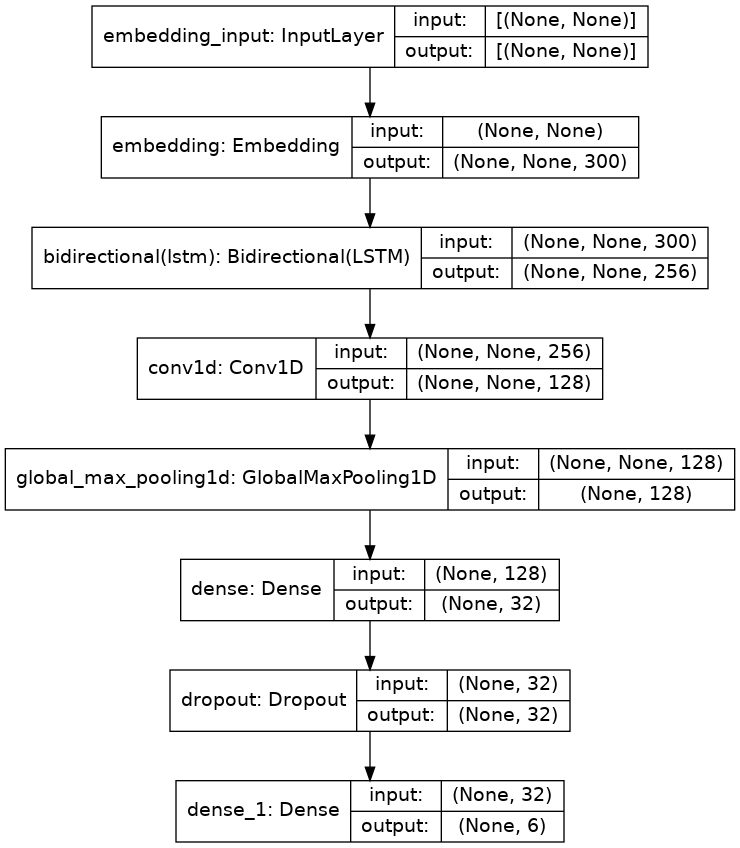

In [20]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='model.png')
plot_model(model, to_file='model_shapes.png', show_shapes=True)


In [21]:
model.fit(x = training_padded, y = train_y, epochs = 2, batch_size = 200)

Epoch 1/2
639/639 [==============================] - 684s 1s/step - loss: 0.1187 - auc: 0.8790
Epoch 2/2
639/639 [==============================] - 678s 1s/step - loss: 0.0445 - auc: 0.9842


In [22]:
file_names = ['../input/youtube-comment-old-to-new/gameTrailer_CoD.csv','../input/youtube-comment-old-to-new/gameTrailer_FarCry6.csv', '../input/youtube-comment-old-to-new/gameTrailer_Pokemon.csv'
        ,'../input/youtube-comment-old-to-new/musicVideo_Baby.csv','../input/youtube-comment-old-to-new/musicVideo_Friday.csv',
#               '../input/youtube-comment-old-to-new/musicVideo_GangnamStyle.csv',
        '../input/youtube-comment-old-to-new/apology_LoganPaul.csv','../input/youtube-comment-old-to-new/apology_Pokimane.csv','../input/youtube-comment-old-to-new/apology_PewDiePie.csv']




file_result_name = ['gameTrailer_CoD','FarCry6','gameTrailer_Pokemon', 
                    'musicVideo_Baby', 'musicVideo_Friday',
#                     'musicVideo_Gangnam', 
 'apology_LoganPaul', 'apology_Pokimane', 'apology_Pewdipie'                
                   ]
for idx, file in enumerate(file_names):

    dataset = pd.read_csv(file, usecols = [0], engine = "python", sep=',', quotechar='"', error_bad_lines=False)
    dataset_save = pd.read_csv(file, usecols = [0], engine = "python", sep=',', quotechar='"', error_bad_lines=False)
    dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(clean_text)
    dataset_sequences = tokenizer.texts_to_sequences(dataset.iloc[:, 0])
    dataset_padded = pad_sequences(dataset_sequences, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')
    predicted = model.predict(dataset_padded, batch_size = 200)
    predicted_result = pd.DataFrame(predicted, columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
    
    print("----------dataset_Save------------")
    
    
    joined = dataset_save.join(predicted_result)
    print("----------joined------------")
    print(joined.head(5))
    
    joined.columns = ['comments', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    joined.to_csv('result_time_{}.csv'.format(file_result_name[idx]), index = False)
    

Skipping line 32: ',' expected after '"'
Skipping line 50: ',' expected after '"'
Skipping line 241: ',' expected after '"'
Skipping line 517: ',' expected after '"'
Skipping line 539: ',' expected after '"'
Skipping line 555: ',' expected after '"'
Skipping line 556: ',' expected after '"'
Skipping line 799: ',' expected after '"'
Skipping line 831: ',' expected after '"'
Skipping line 855: ',' expected after '"'
Skipping line 862: ',' expected after '"'
Skipping line 886: ',' expected after '"'
Skipping line 972: ',' expected after '"'
Skipping line 976: ',' expected after '"'
Skipping line 1014: ',' expected after '"'
Skipping line 1026: ',' expected after '"'
Skipping line 1069: ',' expected after '"'
Skipping line 1096: ',' expected after '"'
Skipping line 1108: ',' expected after '"'
Skipping line 1150: ',' expected after '"'
Skipping line 1212: ',' expected after '"'
Skipping line 1219: ',' expected after '"'
Skipping line 1237: ',' expected after '"'
Skipping line 1253: ',' exp

----------dataset_Save------------
----------joined------------
                         I miss the dislike button 😪     toxic  severe_toxic  \
0  I don't understand why infinite warfare been h...  0.003273      0.000004   
1                                           Disliked  0.195761      0.000258   
2                                     Dislike button  0.013236      0.000015   
3  Now that the dislike button has gone this look...  0.008947      0.000007   
4                                              🔥🙏🎮🌍⏳  0.021067      0.000029   

    obscene    threat    insult  identity_hate  
0  0.000311  0.000050  0.000218       0.000080  
1  0.013930  0.002259  0.020643       0.002907  
2  0.001173  0.000154  0.001070       0.000270  
3  0.000638  0.000077  0.000585       0.000142  
4  0.001744  0.000313  0.001809       0.000449  


Skipping line 22: ',' expected after '"'
Skipping line 57: ',' expected after '"'
Skipping line 73: ',' expected after '"'
Skipping line 87: ',' expected after '"'
Skipping line 128: ',' expected after '"'
Skipping line 130: ',' expected after '"'
Skipping line 192: ',' expected after '"'
Skipping line 248: ',' expected after '"'
Skipping line 276: ',' expected after '"'
Skipping line 326: ',' expected after '"'
Skipping line 339: ',' expected after '"'
Skipping line 361: ',' expected after '"'
Skipping line 402: ',' expected after '"'
Skipping line 431: ',' expected after '"'
Skipping line 439: ',' expected after '"'
Skipping line 500: ',' expected after '"'
Skipping line 526: ',' expected after '"'
Skipping line 556: ',' expected after '"'
Skipping line 559: ',' expected after '"'
Skipping line 648: ',' expected after '"'
Skipping line 690: ',' expected after '"'
Skipping line 700: ',' expected after '"'
Skipping line 704: ',' expected after '"'
Skipping line 823: ',' expected after 

----------dataset_Save------------
----------joined------------
  if only the actual game graphics and cut scene graphics were like this  \
0                       Yeh this game is shiteeee 🤣🤣                       
1  This game had one of the best final acts since...                       
2  Biblion allows you to save, rate, comment and ...                       
3  0:08 Me thinking that its just a random dude: ...                       
4  Has anyone played the actual game, I’ve played...                       

      toxic  severe_toxic   obscene    threat    insult  identity_hate  
0  0.111816  1.677472e-04  0.009744  0.001412  0.012828       0.002136  
1  0.000321  2.652220e-07  0.000036  0.000004  0.000016       0.000008  
2  0.000382  1.485803e-07  0.000037  0.000003  0.000016       0.000006  
3  0.015764  1.754467e-05  0.001373  0.000188  0.001147       0.000312  
4  0.134549  1.543460e-04  0.019879  0.000782  0.019584       0.002481  


Skipping line 63: ',' expected after '"'
Skipping line 131: ',' expected after '"'
Skipping line 180: ',' expected after '"'
Skipping line 202: ',' expected after '"'
Skipping line 227: ',' expected after '"'
Skipping line 256: ',' expected after '"'
Skipping line 270: ',' expected after '"'
Skipping line 320: ',' expected after '"'
Skipping line 335: ',' expected after '"'
Skipping line 391: ',' expected after '"'
Skipping line 458: ',' expected after '"'
Skipping line 459: ',' expected after '"'
Skipping line 484: ',' expected after '"'
Skipping line 496: ',' expected after '"'
Skipping line 593: ',' expected after '"'
Skipping line 616: ',' expected after '"'
Skipping line 624: ',' expected after '"'
Skipping line 759: ',' expected after '"'
Skipping line 797: ',' expected after '"'
Skipping line 819: ',' expected after '"'
Skipping line 840: ',' expected after '"'
Skipping line 922: ',' expected after '"'
Skipping line 1134: ',' expected after '"'
Skipping line 1186: ',' expected a

----------dataset_Save------------
----------joined------------
  Heads up Platinum has more content than the remakes     toxic  severe_toxic  \
0                        joke of playing it on a n64   0.202639  2.473732e-04   
1            I’m so happy they reworked the graphics   0.000153  1.278282e-07   
2  Im so happy they overworked the graphics, they...   0.001667  1.417390e-06   
3                   be looking like a roblox game fr   0.062378  6.901013e-05   
4  So yay for sinnoh but why no johto? hell we're...   0.059025  3.767142e-05   

    obscene    threat    insult  identity_hate  
0  0.015068  0.002109  0.022449       0.003180  
1  0.000018  0.000002  0.000007       0.000004  
2  0.000174  0.000017  0.000096       0.000033  
3  0.004060  0.000718  0.005501       0.001054  
4  0.005492  0.000225  0.004649       0.000463  


Skipping line 34: ',' expected after '"'
Skipping line 39: ',' expected after '"'
Skipping line 275: ',' expected after '"'
Skipping line 294: ',' expected after '"'
Skipping line 643: ',' expected after '"'
Skipping line 660: ',' expected after '"'
Skipping line 820: ',' expected after '"'
Skipping line 870: ',' expected after '"'
Skipping line 1033: ',' expected after '"'
Skipping line 1100: ',' expected after '"'
Skipping line 1137: ',' expected after '"'
Skipping line 1231: ',' expected after '"'
Skipping line 1318: ',' expected after '"'
Skipping line 1392: ',' expected after '"'
Skipping line 1457: ',' expected after '"'
Skipping line 1527: ',' expected after '"'
Skipping line 1744: ',' expected after '"'
Skipping line 1872: ',' expected after '"'
Skipping line 2009: ',' expected after '"'
Skipping line 2258: ',' expected after '"'
Skipping line 2326: ',' expected after '"'
Skipping line 2336: ',' expected after '"'
Skipping line 2446: ',' expected after '"'
Skipping line 2734: '

----------dataset_Save------------
----------joined------------
           I was 1 years old when this song came out     toxic  severe_toxic  \
0                                  Drake and Tinashe  0.269674      0.000654   
1  Big respect to everyone who took back their di...  0.015267      0.000020   
2                                                 Me  0.012338      0.000014   
3            I know right 😁 this song is the best 🦊💕  0.003874      0.000004   
4  es doloroso como justin recibia tanto ODIO y e...  0.008857      0.000010   

    obscene    threat    insult  identity_hate  
0  0.019517  0.005827  0.037066       0.007087  
1  0.001150  0.000245  0.001147       0.000338  
2  0.000825  0.000185  0.000913       0.000253  
3  0.000388  0.000053  0.000254       0.000090  
4  0.001343  0.000076  0.000720       0.000209  


Skipping line 10: ',' expected after '"'
Skipping line 115: ',' expected after '"'
Skipping line 120: ',' expected after '"'
Skipping line 160: ',' expected after '"'
Skipping line 168: ',' expected after '"'
Skipping line 275: ',' expected after '"'
Skipping line 294: ',' expected after '"'
Skipping line 304: ',' expected after '"'
Skipping line 341: ',' expected after '"'
Skipping line 376: ',' expected after '"'
Skipping line 399: ',' expected after '"'
Skipping line 433: ',' expected after '"'
Skipping line 467: ',' expected after '"'
Skipping line 471: ',' expected after '"'
Skipping line 473: ',' expected after '"'
Skipping line 684: ',' expected after '"'
Skipping line 738: ',' expected after '"'
Skipping line 828: ',' expected after '"'
Skipping line 832: ',' expected after '"'
Skipping line 855: ',' expected after '"'
Skipping line 915: ',' expected after '"'
Skipping line 917: ',' expected after '"'
Skipping line 994: ',' expected after '"'
Skipping line 1036: ',' expected af

----------dataset_Save------------
----------joined------------
       It's better than trap hip hop music  though 😄     toxic  severe_toxic  \
0  1:54 did he... did he just clap? That would be...  0.336628  7.661793e-04   
1  I came here because I watched a vid that menti...  0.000247  1.316879e-07   
2                                            Dislike  0.008744  1.036418e-05   
3                          Use me as Dislike button.  0.018586  2.271694e-05   
4  Today is Friday and I just found this masterpi...  0.962490  1.698125e-02   

    obscene    threat    insult  identity_hate  
0  0.031552  0.005600  0.057923       0.008818  
1  0.000030  0.000002  0.000010       0.000005  
2  0.000686  0.000125  0.000645       0.000193  
3  0.001499  0.000246  0.001468       0.000433  
4  0.898928  0.004098  0.480919       0.011769  
----------dataset_Save------------
----------joined------------
                        Use me as the dislike button     toxic  severe_toxic  \
0  So glad no one

Skipping line 48: ',' expected after '"'
Skipping line 114: ',' expected after '"'
Skipping line 166: ',' expected after '"'
Skipping line 190: ',' expected after '"'
Skipping line 191: ',' expected after '"'
Skipping line 205: ',' expected after '"'
Skipping line 222: ',' expected after '"'
Skipping line 233: ',' expected after '"'
Skipping line 255: ',' expected after '"'
Skipping line 320: ',' expected after '"'
Skipping line 407: ',' expected after '"'
Skipping line 409: ',' expected after '"'
Skipping line 412: ',' expected after '"'
Skipping line 611: ',' expected after '"'
Skipping line 671: ',' expected after '"'
Skipping line 672: ',' expected after '"'
Skipping line 688: ',' expected after '"'
Skipping line 755: ',' expected after '"'
Skipping line 779: ',' expected after '"'
Skipping line 785: ',' expected after '"'
Skipping line 797: ',' expected after '"'
Skipping line 855: ',' expected after '"'
Skipping line 1023: ',' expected after '"'
Skipping line 1040: ',' expected a

----------dataset_Save------------
----------joined------------
  Did u know that if u jump off a bridge you break 70% of ur bones?     toxic  \
0                    POV : Confusing comment section                 0.000091   
1  that’s cool, but did you know the hit 2009 web...                 0.031885   
2  okay but did you know that only 10% of scienti...                 0.006853   
3  Also did you know that a sacrifice had to be m...                 0.005279   
4  This is cool but do you know that people die f...                 0.389328   

   severe_toxic   obscene    threat    insult  identity_hate  
0  6.055806e-08  0.000010  0.000001  0.000004       0.000002  
1  3.701642e-05  0.002569  0.000381  0.002720       0.000611  
2  5.468661e-06  0.000577  0.000063  0.000462       0.000109  
3  2.853308e-06  0.000463  0.000030  0.000268       0.000095  
4  1.001864e-03  0.030080  0.007899  0.063448       0.011780  


Skipping line 74: ',' expected after '"'
Skipping line 85: ',' expected after '"'
Skipping line 164: ',' expected after '"'
Skipping line 214: ',' expected after '"'
Skipping line 265: ',' expected after '"'
Skipping line 275: ',' expected after '"'
Skipping line 292: ',' expected after '"'
Skipping line 309: ',' expected after '"'
Skipping line 311: ',' expected after '"'
Skipping line 333: ',' expected after '"'
Skipping line 421: ',' expected after '"'
Skipping line 485: ',' expected after '"'
Skipping line 506: ',' expected after '"'
Skipping line 545: ',' expected after '"'
Skipping line 634: ',' expected after '"'
Skipping line 645: ',' expected after '"'
Skipping line 738: ',' expected after '"'
Skipping line 823: ',' expected after '"'
Skipping line 942: ',' expected after '"'
Skipping line 943: ',' expected after '"'
Skipping line 958: ',' expected after '"'
Skipping line 983: ',' expected after '"'
Skipping line 1009: ',' expected after '"'
Skipping line 1029: ',' expected af

----------dataset_Save------------
----------joined------------
  It's easy to forgive when he didn't mean it it was thoughts that came out  \
0                                    Yall like him 💀                          
1  He's flopping.  MrBeast will take his spot soo...                          
2  Come on man it's fine, everyone can accidental...                          
3         What a fucking N- \n\n\n\n\n\n\n\nNice guy                          
4   @kuu  people aren’t accepting it they are res...                          

      toxic  severe_toxic   obscene    threat    insult  identity_hate  
0  0.152366      0.000325  0.009774  0.003414  0.017365       0.003914  
1  0.188284      0.000410  0.013737  0.003730  0.023552       0.004553  
2  0.002866      0.000004  0.000285  0.000047  0.000178       0.000079  
3  0.996497      0.212389  0.978041  0.011200  0.777888       0.034878  
4  0.003820      0.000004  0.000358  0.000054  0.000257       0.000088  


In [23]:
file_names = ['../input/youtube-comments-datas/gameTrailer_CoD.csv','../input/youtube-comments-datas/gameTrailer_FarCry6.csv', '../input/youtube-comments-datas/gameTrailer_Pokemon.csv'
        ,'../input/youtube-comments-datas/musicVideo_Baby.csv','../input/youtube-comments-datas/musicVideo_Friday.csv','../input/youtube-comments-datas/musicVideo_GangnamStyle.csv',
        '../input/youtube-comments-datas/apology_my_overdue_apology.csv','../input/youtube-comments-datas/apology_my_response.csv','../input/youtube-comments-datas/apology_so_sorry.csv']
file_result_name = ['gameTrailer_CoD','FarCry6','gameTrailer_Pokemon', 
                    'musicVideo_Baby', 'musicVideo_Friday','musicVideo_Gangnam', 
 'apology_my_overdue_apology', 'apology_my_response', 'apology_so_sorry'                
                   ]
for idx, file in enumerate(file_names):

    dataset = pd.read_csv(file, usecols = [0])
    dataset_save = pd.read_csv(file, usecols = [0])
    dataset.iloc[:, 0] = dataset.iloc[:, 0].apply(clean_text)
    dataset_sequences = tokenizer.texts_to_sequences(dataset.iloc[:, 0])
    dataset_padded = pad_sequences(dataset_sequences, maxlen = maxlen,
                                padding = 'pre',
                                truncating='pre')
    predicted = model.predict(dataset_padded, batch_size = 200)
    predicted_result = pd.DataFrame(predicted, columns = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate'])
    
    print("----------dataset_Save------------")
    
    
    joined = dataset_save.join(predicted_result)
    print("----------joined------------")
    print(joined.head(5))
    
    joined.columns = ['comments', 'toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
    joined.to_csv('result_{}.csv'.format(file_result_name[idx]), index = False)

----------dataset_Save------------
----------joined------------
  this video has 3 million dislikes. Remember that you can't escape this,black sheep of cod  \
0                             the best campaing ever                                          
1  open vid in incognito if you cant see the disl...                                          
2  Here to see the dislikes before they take them...                                          
3                  RIP DISLIKE 2005 & 2021 😂😂😂🤣🤣🤣😄😄😄                                          
4                            Where the dislikes went                                          

      toxic  severe_toxic   obscene    threat    insult  identity_hate  
0  0.010565  1.205149e-05  0.001069  0.000121  0.000834       0.000223  
1  0.001997  2.185418e-06  0.000165  0.000032  0.000115       0.000045  
2  0.015350  2.191061e-05  0.001073  0.000292  0.001082       0.000363  
3  0.021510  2.230201e-05  0.002013  0.000188  0.001721       0.000337  
